# Home Task 7

## Importing liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Creating Dataframe

In [3]:
data = {
    'Class': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'Feature1': [1.5, 1.8, 1.7, 2.0, 1.9, 3.2, 3.5, 3.3, 3.6, 3.4, 5.0, 5.2, 5.1, 5.3, 5.4],
    'Feature2': [2.0, 2.3, 2.1, 2.4, 2.2, 3.5, 3.6, 3.4, 3.7, 3.5, 5.5, 5.7, 5.6, 5.8, 5.7]
}
df = pd.DataFrame(data)


In [4]:
df

,Class,Feature1,Feature2
0,0,1.5,2.0
1,0,1.8,2.3
2,0,1.7,2.1
3,0,2.0,2.4
4,0,1.9,2.2
5,1,3.2,3.5
6,1,3.5,3.6
7,1,3.3,3.4
8,1,3.6,3.7
9,1,3.4,3.5


## Computing the mean of vectors

In [5]:
class_means = df.groupby('Class').mean()


In [6]:
class_means

,Feature1,Feature2
Class,,
0,1.78,2.20
1,3.40,3.54
2,5.20,5.66


## Calculate the within-class scatter matrix (SW) and the between-class scatter matrix (SB)

In [7]:
n_classes = df['Class'].nunique()

n_classes

3

In [8]:
SW = np.zeros((2, 2))

In [9]:
SW = np.zeros((2, 2))  # Initialize the SW matrix
for c in range(n_classes):
    class_data = df[df['Class'] == c][['Feature1', 'Feature2']].values
    mean_class = class_means.loc[c].values
    SW += np.dot((class_data - mean_class).T, (class_data - mean_class))


In [10]:
SW

array([[0.348, 0.23 ],
       [0.23 , 0.204]])

In [11]:
SB = np.zeros((2, 2))

In [12]:
mean_overall = df[['Feature1', 'Feature2']].mean().values
SB = np.zeros((2, 2))  # Initialize the SB matrix
for c in range(n_classes):
    class_data = df[df['Class'] == c][['Feature1', 'Feature2']].values
    mean_class = class_means.loc[c].values
    n_class = class_data.shape[0]  # Number of samples in class
    mean_diff = mean_class - mean_overall
    SB += n_class * np.outer(mean_diff, mean_diff)


In [13]:
SB

array([[29.268, 29.7  ],
       [29.7  , 30.436]])

##  Find eigenvalues and eigenvectors

In [14]:
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))


## Sort the eigenvalues and select the eigenvectors corresponding to the largest eigenvalues

In [15]:
eigvals_sorted_indices = np.argsort(eigvals)[::-1]
sorted_eigvals = eigvals[eigvals_sorted_indices]
sorted_eigvecs = eigvecs[:, eigvals_sorted_indices]


## Project the data onto the lower-dimensional space

In [16]:
top_eigenvector = sorted_eigvecs[:, 0]
projected_data = df[['Feature1', 'Feature2']].dot(top_eigenvector)


## Create a 2D scatter plot of the projected data

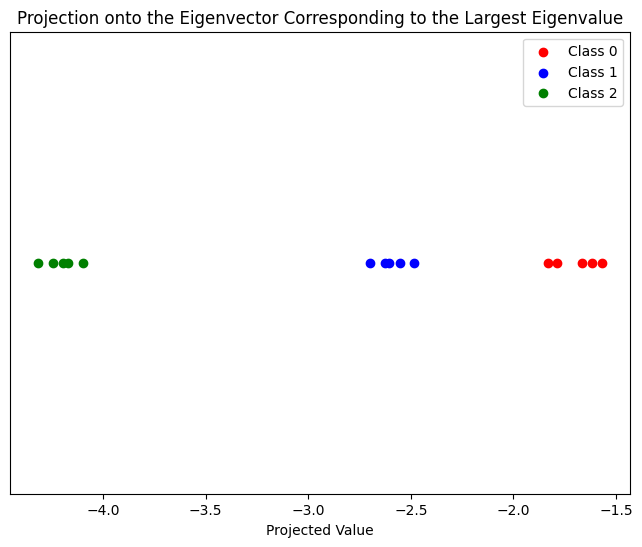

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[df['Class'] == 0], np.zeros_like(projected_data[df['Class'] == 0]), color='red', label='Class 0')
plt.scatter(projected_data[df['Class'] == 1], np.zeros_like(projected_data[df['Class'] == 1]), color='blue', label='Class 1')
plt.scatter(projected_data[df['Class'] == 2], np.zeros_like(projected_data[df['Class'] == 2]), color='green', label='Class 2')
plt.title("Projection onto the Eigenvector Corresponding to the Largest Eigenvalue")
plt.xlabel("Projected Value")
plt.yticks([])  # Hide y-axis ticks
plt.legend()
plt.show()
